In [1]:
#STEP 1 & 2: Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Creating a file path
path = r'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [5]:
path

'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [7]:
# Importing the gun violence file
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Gun_Violence_Clean_Data(2013-2018).csv'))

In [9]:
#STEP 3: Data preparation and visualization for the analysis
df['casualties'] = df['n_killed'] + df['n_injured']
df_reg = df[['n_guns_involved', 'casualties']].dropna()

In [11]:
# Verifing the dataset
df.describe()

,Unnamed: 0,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,casualties
count,239677.000000,2.396770e+05,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,119838.000000,5.593343e+05,0.252290,0.494007,7.552698,37.580449,-89.236244,1.217902,46.315808,17.579618,0.746296
std,69188.934572,2.931287e+05,0.521779,0.729952,8.495690,5.048567,14.131003,3.583024,43.750294,15.112348,0.842343
min,0.000000,9.211400e+04,0.000000,0.000000,-1.000000,19.111400,-171.429000,1.000000,-1.000000,-1.000000,0.000000
25%,59919.000000,3.085450e+05,0.000000,0.000000,2.000000,33.985200,-93.600900,1.000000,9.000000,5.000000,0.000000
50%,119838.000000,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,35.000000,15.000000,1.000000
75%,179757.000000,8.172280e+05,0.000000,1.000000,10.000000,41.285100,-80.136700,1.000000,77.000000,29.000000,1.000000
max,239676.000000,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.000000,103.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   239677 non-null  int64  
 1   incident_id                  239677 non-null  int64  
 2   date                         239677 non-null  object 
 3   state                        239677 non-null  object 
 4   city_or_county               239677 non-null  object 
 5   address                      239677 non-null  object 
 6   n_killed                     239677 non-null  int64  
 7   n_injured                    239677 non-null  int64  
 8   incident_url                 239677 non-null  object 
 9   source_url                   239677 non-null  object 
 10  incident_url_fields_missing  239677 non-null  bool   
 11  congressional_district       239677 non-null  float64
 12  gun_stolen                   239677 non-null  object 
 13 

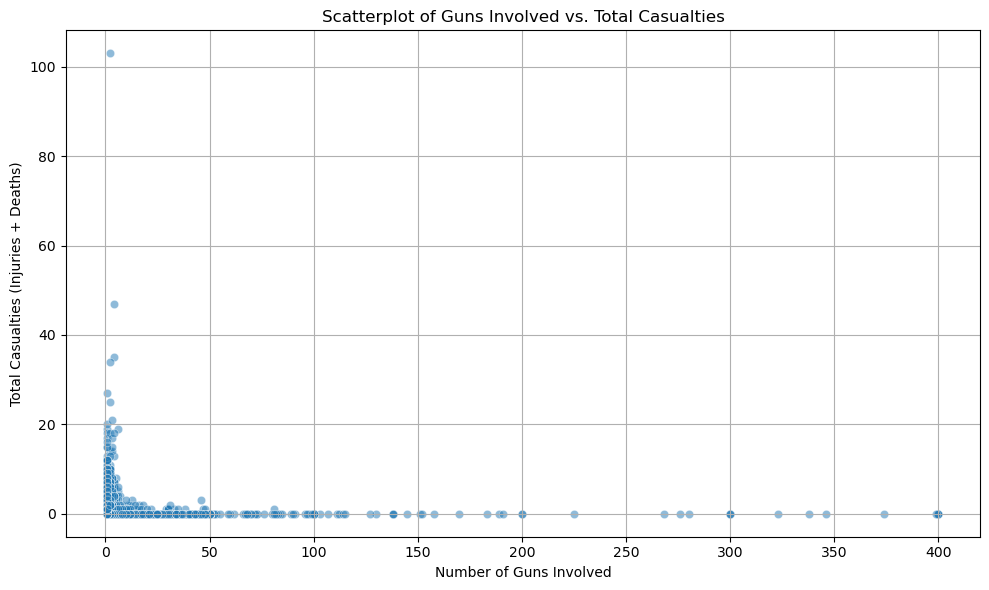

In [15]:
# Visiualization process
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_reg, x='n_guns_involved', y='casualties', alpha=0.5)
plt.title('Scatterplot of Guns Involved vs. Total Casualties')
plt.xlabel('Number of Guns Involved')
plt.ylabel('Total Casualties (Injuries + Deaths)')
plt.grid(True)
plt.tight_layout()
plt.show()

### STEP 5: Hypothesis
#### H0: Number of guns involved does not impact total casualties.
#### H1: More guns = more injuries/fatalities.

In [19]:
# STEP 6: Prepare data for modeling
X = df_reg[['n_guns_involved']].values
y = df_reg['casualties'].values

In [25]:
# STEP 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# STEP 8: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

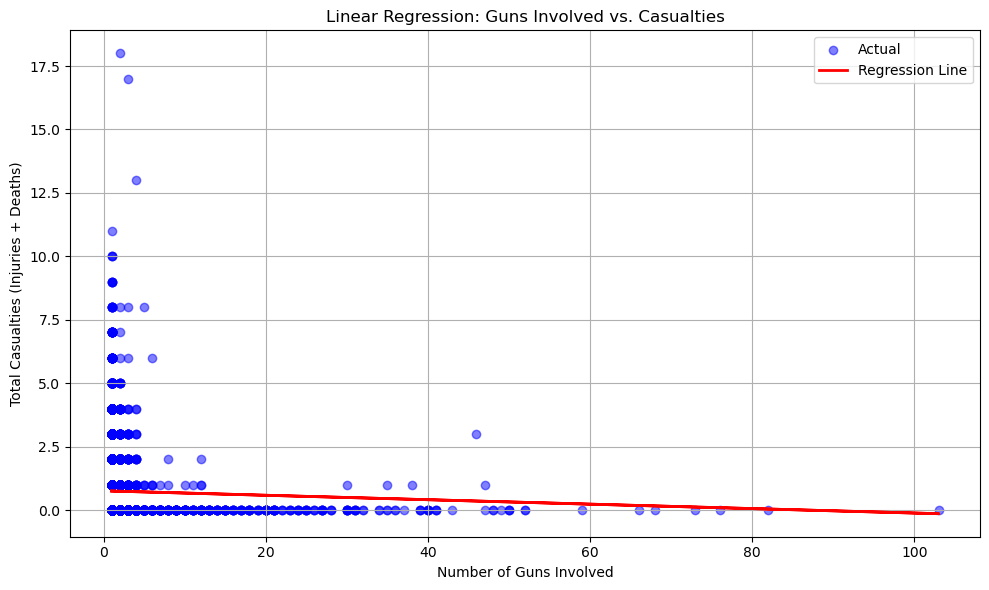

In [29]:
# STEP 9: Plot regression line on test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Guns Involved vs. Casualties')
plt.xlabel('Number of Guns Involved')
plt.ylabel('Total Casualties (Injuries + Deaths)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### STEP 10: Interpretation
#### The regression line appears very flat, indicating a weak relationship.

In [33]:
# STEP 11: Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.638
R^2 Score: 0.0024


In [35]:
# STEP 12: Compare actual vs predicted
df_compare = pd.DataFrame({
    'Actual Casualties': y_test,
    'Predicted Casualties': y_pred
})

In [37]:
df_compare.head(10)

,Actual Casualties,Predicted Casualties
0,1,0.748247
1,1,0.748247
2,1,0.748247
3,0,0.748247
4,1,0.748247
5,0,0.748247
6,1,0.748247
7,0,0.748247
8,2,0.748247
9,2,0.748247


### STEP 13: Reflection
#### R^2 score is very low, suggesting number of guns is a poor predictor.
#### Model predictions cluster around the mean.
#### Possible biases or missing influential variables may affect results.